In [1]:
# Modelo de AM com dataset de cólica de cavalo para tratamento de dados faltantes e aplicação do Decision Trees
# Importando Bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

from numpy import isnan
from sklearn.impute import SimpleImputer

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Carregamento do dataset marcando os dados faltantes
arquivo = pd.read_csv('C:/UCPEL/IA-ML/horse-colic.csv', header=None, na_values='?')

In [3]:
# Visualização do conjunto de dados após a substituição dos ? por NaN
arquivo.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,2.0,1,530101,38.5,66.0,28.0,3.0,3.0,NaN,2.0,...,45.0,8.4,NaN,NaN,2.0,2,11300,0,0,2
1,1.0,1,534817,39.2,88.0,20.0,NaN,NaN,4.0,1.0,...,50.0,85.0,2.0,2.0,3.0,2,2208,0,0,2
2,2.0,1,530334,38.3,40.0,24.0,1.0,1.0,3.0,1.0,...,33.0,6.7,NaN,NaN,1.0,2,0,0,0,1
3,1.0,9,5290409,39.1,164.0,84.0,4.0,1.0,6.0,2.0,...,48.0,7.2,3.0,5.3,2.0,1,2208,0,0,1
4,2.0,1,530255,37.3,104.0,35.0,NaN,NaN,6.0,2.0,...,74.0,7.4,NaN,NaN,2.0,2,4300,0,0,2


In [4]:
# Visualização do final do conjunto de dados após a substituição dos ? por NaN
arquivo.tail()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
295,1.0,1,533886,NaN,120.0,70.0,4.0,NaN,4.0,2.0,...,55.0,65.0,NaN,NaN,3.0,2,3205,0,0,2
296,2.0,1,527702,37.2,72.0,24.0,3.0,2.0,4.0,2.0,...,44.0,NaN,3.0,3.3,3.0,1,2208,0,0,1
297,1.0,1,529386,37.5,72.0,30.0,4.0,3.0,4.0,1.0,...,60.0,6.8,NaN,NaN,2.0,1,3205,0,0,2
298,1.0,1,530612,36.5,100.0,24.0,3.0,3.0,3.0,1.0,...,50.0,6.0,3.0,3.4,1.0,1,2208,0,0,1
299,1.0,1,534618,37.2,40.0,20.0,NaN,NaN,NaN,NaN,...,36.0,62.0,1.0,1.0,3.0,2,6112,0,0,2


In [5]:
# Visualização do tamanho do conjunto de dados
arquivo.shape

(300, 28)

In [6]:
# Indicando o número de linhas com dados faltantes para cada coluna
for i in range(arquivo.shape[1]):
    # Conta o número de linhas com dados faltantes
    n_miss = arquivo[[i]].isnull().sum()
    perc = n_miss / arquivo.shape[0] * 100
    print('> %d, Faltantes: %d (%.1f%%)' % (i, n_miss, perc))

> 0, Faltantes: 1 (0.3%)
> 1, Faltantes: 0 (0.0%)
> 2, Faltantes: 0 (0.0%)
> 3, Faltantes: 60 (20.0%)
> 4, Faltantes: 24 (8.0%)
> 5, Faltantes: 58 (19.3%)
> 6, Faltantes: 56 (18.7%)
> 7, Faltantes: 69 (23.0%)
> 8, Faltantes: 47 (15.7%)
> 9, Faltantes: 32 (10.7%)
> 10, Faltantes: 55 (18.3%)
> 11, Faltantes: 44 (14.7%)
> 12, Faltantes: 56 (18.7%)
> 13, Faltantes: 104 (34.7%)
> 14, Faltantes: 106 (35.3%)
> 15, Faltantes: 247 (82.3%)
> 16, Faltantes: 102 (34.0%)
> 17, Faltantes: 118 (39.3%)
> 18, Faltantes: 29 (9.7%)
> 19, Faltantes: 33 (11.0%)
> 20, Faltantes: 165 (55.0%)
> 21, Faltantes: 198 (66.0%)
> 22, Faltantes: 1 (0.3%)
> 23, Faltantes: 0 (0.0%)
> 24, Faltantes: 0 (0.0%)
> 25, Faltantes: 0 (0.0%)
> 26, Faltantes: 0 (0.0%)
> 27, Faltantes: 0 (0.0%)


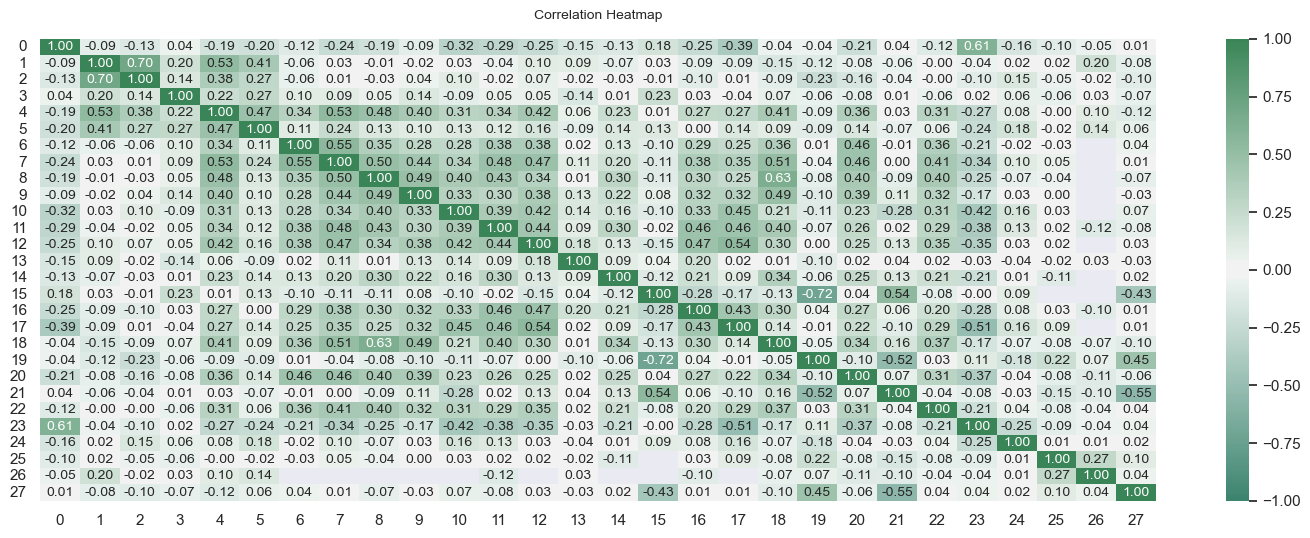

In [7]:
# Matriz de correlação (Biblioteca Seaborn), com os dados de correlação nas células
sns.set(font_scale=1)
plt.figure (figsize = (18, 6))
cmap = sns.diverging_palette(160, 140, sep=10, as_cmap=True)
heatmap = sns.heatmap(arquivo.corr(), cmap=cmap, annot=True, vmin=-1, vmax=1,fmt=".2f", annot_kws={'size':10})
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':10}, pad=14);

In [13]:
# Tratamento de dados com função SimpleImputer (Imputação Estatística)
# Separação entre elementos de entrada e saída
data = arquivo.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]

In [14]:
# Resumindo o total de dados faltantes
print('Faltantes: %d' % sum(isnan(X).flatten()))

Faltantes: 1605


In [15]:
# Definindo o imputer
imputer = SimpleImputer(strategy='mean')

In [16]:
# Fit no conjunto de dados
imputer.fit(X)

SimpleImputer()

In [17]:
# Transformação do conjunto de dados
Xtrans = imputer.transform(X)

In [18]:
# Resumindo o total de dados faltantes
print('Faltantes: %d' % sum(isnan(Xtrans).flatten()))

Faltantes: 0


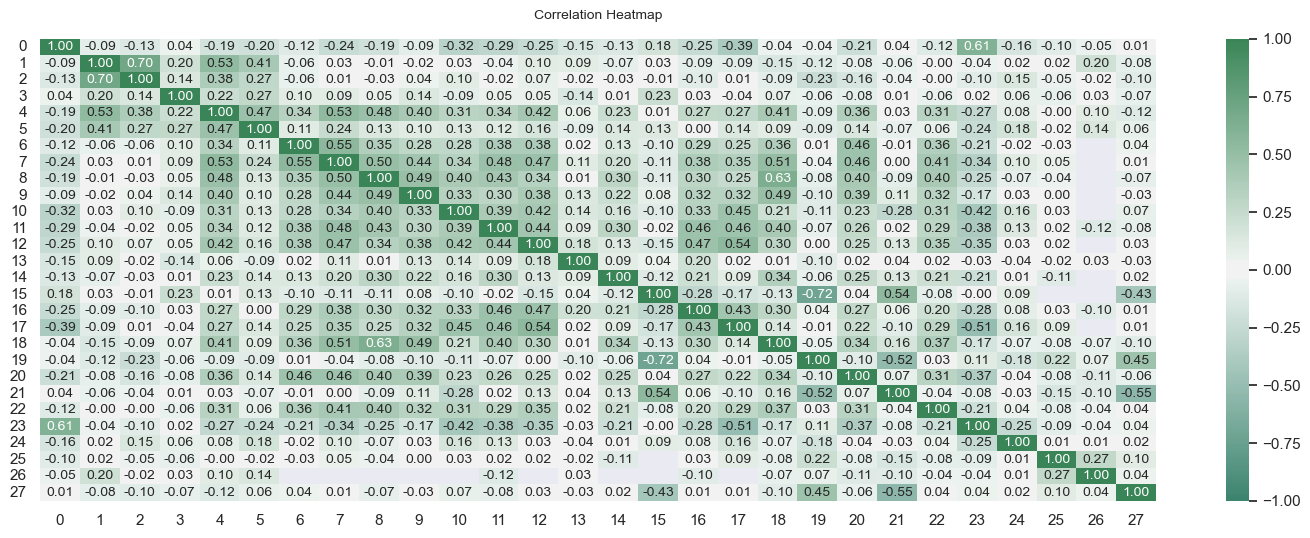

In [19]:
# Matriz de correlação (Biblioteca Seaborn), com os dados de correlação nas células
sns.set(font_scale=1)
plt.figure (figsize = (18, 6))
cmap = sns.diverging_palette(160, 140, sep=10, as_cmap=True)
heatmap = sns.heatmap(arquivo.corr(), cmap=cmap, annot=True, vmin=-1, vmax=1,fmt=".2f", annot_kws={'size':10})
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':10}, pad=14);

In [20]:
arquivo.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,2.0,1,530101,38.5,66.0,28.0,3.0,3.0,NaN,2.0,...,45.0,8.4,NaN,NaN,2.0,2,11300,0,0,2
1,1.0,1,534817,39.2,88.0,20.0,NaN,NaN,4.0,1.0,...,50.0,85.0,2.0,2.0,3.0,2,2208,0,0,2
2,2.0,1,530334,38.3,40.0,24.0,1.0,1.0,3.0,1.0,...,33.0,6.7,NaN,NaN,1.0,2,0,0,0,1
3,1.0,9,5290409,39.1,164.0,84.0,4.0,1.0,6.0,2.0,...,48.0,7.2,3.0,5.3,2.0,1,2208,0,0,1
4,2.0,1,530255,37.3,104.0,35.0,NaN,NaN,6.0,2.0,...,74.0,7.4,NaN,NaN,2.0,2,4300,0,0,2
